# Linear Algebra for Graphs

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## 1 The gradient, incidence and Laplacian matrices

### 1.1 Simple unweighted, undirected graph: the path graph

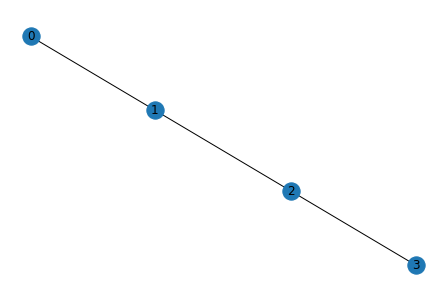

In [18]:
Gl = nx.path_graph(4)
nx.draw(Gl, with_labels=True)

In [19]:
A = nx.adjacency_matrix(Gl)
A.todense() # numpy matrix

matrix([[0, 1, 0, 0],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 0, 1, 0]], dtype=int32)

In [20]:
S = nx.incidence_matrix(Gl, oriented=True)
S.todense()

matrix([[-1.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  1.]])

In [21]:
S.dot(S.T).todense()

matrix([[ 1., -1.,  0.,  0.],
        [-1.,  2., -1.,  0.],
        [ 0., -1.,  2., -1.],
        [ 0.,  0., -1.,  1.]])

In [22]:
L = nx.laplacian_matrix(Gl)
L.todense()

matrix([[ 1, -1,  0,  0],
        [-1,  2, -1,  0],
        [ 0, -1,  2, -1],
        [ 0,  0, -1,  1]], dtype=int32)

### 1.2 Connection with the standard discrete setting

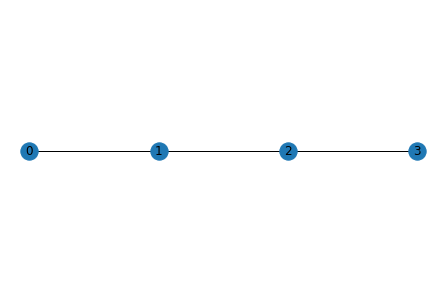

In [23]:
# Let us build the path graph again
Gl = nx.path_graph(4)
pos = dict((n,(n,0)) for n in Gl.nodes())
nx.draw(Gl, pos, with_labels=True)

In [24]:
pos

{0: (0, 0), 1: (1, 0), 2: (2, 0), 3: (3, 0)}

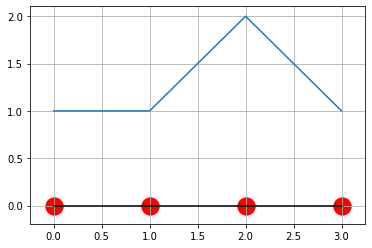

In [25]:
# Example of a function on the nodes
f = [1, 1, 2, 1]
# Plot the function
plt.plot(f)
# plot the path graph
plt.plot([0, 1, 2, 3], [0, 0, 0, 0], 'k')  # black line
plt.scatter(*zip(*pos.values()), c='r', s=300)  # red dots
plt.grid()

### 1.3 A graph with weights

In [36]:
# Let us change the weights of the path graph
Aw = A.copy()
Aw[0, 1] = 2
Aw[1, 0] = 2
Aw[1, 2] = 10
Aw[2, 1] = 10

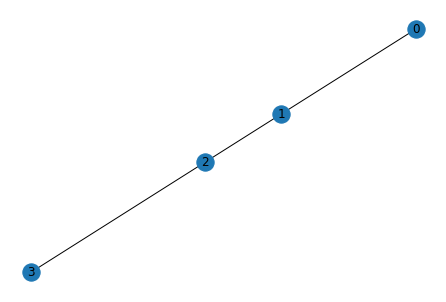

In [37]:
Gw = nx.from_numpy_array(Aw.todense())
nx.draw(Gw, with_labels=True)

In [38]:
S = nx.incidence_matrix(Gw, oriented=True, weight='weight')
S.todense()

matrix([[ -2.,   0.,   0.],
        [  2., -10.,   0.],
        [  0.,  10.,  -1.],
        [  0.,   0.,   1.]])

In [39]:
L = nx.laplacian_matrix(Gw)
L.todense()

matrix([[  2,  -2,   0,   0],
        [ -2,  12, -10,   0],
        [  0, -10,  11,  -1],
        [  0,   0,  -1,   1]], dtype=int32)

### 1.4 A directed graph example

In [40]:
Gld = nx.path_graph(4, create_using=nx.DiGraph())

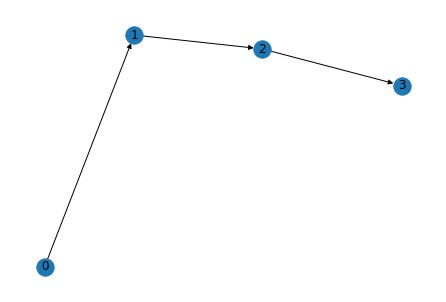

In [41]:
nx.draw(Gld, with_labels=True)

In [42]:
nx.incidence_matrix(Gld, oriented=True).todense()

matrix([[-1.,  0.,  0.],
        [ 1., -1.,  0.],
        [ 0.,  1., -1.],
        [ 0.,  0.,  1.]])

In [43]:
nx.adjacency_matrix(Gld).todense()

matrix([[0, 1, 0, 0],
        [0, 0, 1, 0],
        [0, 0, 0, 1],
        [0, 0, 0, 0]], dtype=int32)

### 1.5 How to compute the gradient?

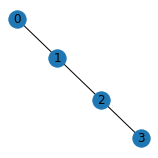

In [44]:
# Let us load the path graph again
Gl = nx.path_graph(4)
A = nx.adj_matrix(Gl)
A = A.todense()
plt.figure(figsize=(2, 2))
nx.draw(Gl, with_labels=True)

In [45]:
print('Weight matrix')
print(A)

Weight matrix
[[0 1 0 0]
 [1 0 1 0]
 [0 1 0 1]
 [0 0 1 0]]


In [46]:
# Let us compute the gradient
N = A.shape[0]  # number of nodes
E = np.sum(A>0)  # number of edges (non-zero entries of A)
gradient = np.zeros((E, N))
eij = 0  # edge index
for i in range(N):
    for j in range(N):
        wij = A[i, j]
        if wij > 0:
            print('Edge ({},{}) has index {} and weight {}.'.format(i, j, eij, wij))
            eij = eij + 1  # increment the edge index

Edge (0,1) has index 0 and weight 1.
Edge (1,0) has index 1 and weight 1.
Edge (1,2) has index 2 and weight 1.
Edge (2,1) has index 3 and weight 1.
Edge (2,3) has index 4 and weight 1.
Edge (3,2) has index 5 and weight 1.


In [48]:
L = nx.laplacian_matrix(Gl)

In [51]:
print(L.todense())

[[ 1 -1  0  0]
 [-1  2 -1  0]
 [ 0 -1  2 -1]
 [ 0  0 -1  1]]


## 2 Eigenvectors and their visualization

### 2.1 The grid graph

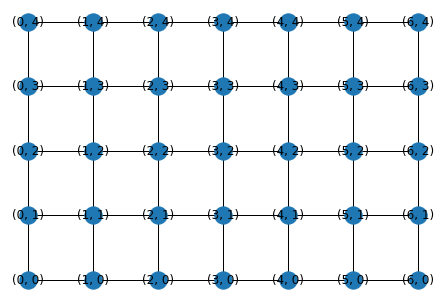

In [54]:
# Let us build a 2d grid graph
nb_rows, nb_cols = 5, 7
Gd = nx.grid_2d_graph(nb_cols, nb_rows, periodic=False)
Ad = nx.adjacency_matrix(Gd)
# Choose regular positions
pos = dict((n, n) for n in Gd.nodes())
#nx.draw_networkx(Gd)
nx.draw(Gd, pos, with_labels=True)

### 2.2 Function on a graph

In [55]:
nb_nodes = nb_rows * nb_cols
f = np.zeros((nb_nodes, 1))
peak_position = 5
f[peak_position] = 1

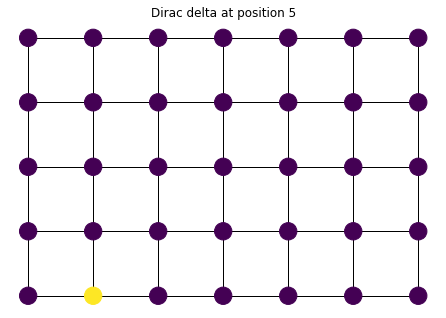

In [60]:
nx.draw(Gd, pos, node_color=f.flatten())
plt.title('Dirac delta at position ' + str(peak_position));

In [61]:
L = nx.laplacian_matrix(Gd)
eigval, eigvect = np.linalg.eigh(L.todense())

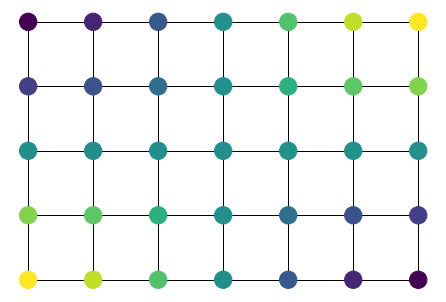

In [62]:
u_k = np.array(eigvect[:, 3]).flatten()
nx.draw(Gd, pos, node_color=u_k)

### 2.3 An irregular graph

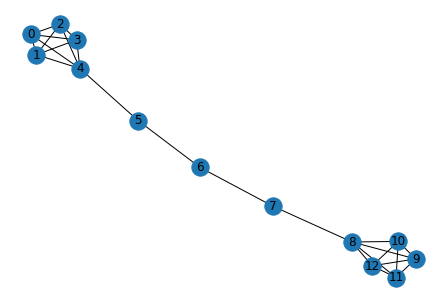

In [64]:
Gb = nx.barbell_graph(5, 3)
#nx.draw(Gb, pos=posGb, with_labels=True)
posGb = nx.spring_layout(Gb)
nx.draw(Gb, pos=posGb, with_labels=True)

In [65]:
Lb = nx.laplacian_matrix(Gb)
eigval, eigvect = np.linalg.eigh(Lb.todense())

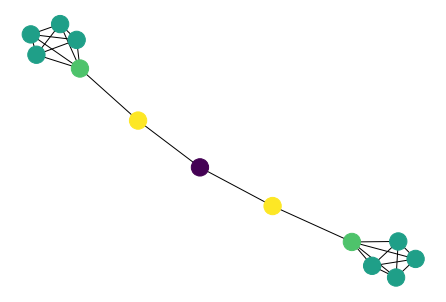

In [66]:
u_k = np.array(eigvect[:, 4]).flatten()
nx.draw(Gb, pos=posGb, node_color=u_k)

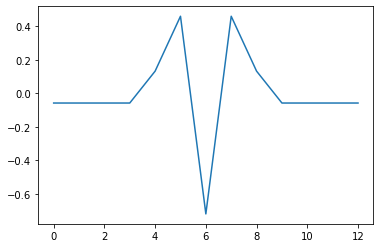

In [68]:
plt.plot(u_k);